# Measurement Model Validation of Second-Harmonic Nonlinear Electrochemical Impedance Spectroscopy

### Yuefan Ji, An-Hung Shih, Rebecca C. Vincent, Rose Y. Lee, and Daniel T. Schwartz<br>*Department of Chemical Engineering & Clean Energy Institute,<br>University of Washington*

# Supplementary Notebook (Measurement Model Program Results)

## List of Figures

### - [Figure S8. Measurement Model Program Results for 18650 Cell Data](#Figure-S8.)
### - [Figure S12. Measurement Model Program Results for Pouch Cell Data](#Figure-S12.)
### - [Figure S15. Measurement Model Program Results for In-house Coin Cell Data](#Figure-S15.)

## Load Essential Packages

In [1]:
## editing system path to enable the load of the nleis.py in the repo
import os.path
import sys
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Get the parent directory by moving up one level
parent_dir = os.path.dirname(os.path.dirname(current_dir))
# Add the parent directory to the Python path
sys.path.append(parent_dir)

In [2]:
## Essential packages
import pandas as pd
import matplotlib.pyplot as plt
import string
from io import StringIO

## Essential function from impedance.py and nleis.py 
from impedance.visualization import plot_residuals
from nleis.visualization import plot_second

## Set the default font size for the plots
plt.rcParams.update({'font.size': 16})
fontsize = 16


# 18650 Results

In [3]:
data_18650 = pd.read_csv(StringIO(open("data/MM_program_results/Z2_18650-C2.txt").read().partition("----")[0]),sep="\t")
data_18650_0p3A = pd.read_csv(StringIO(open("data/MM_program_results/Z2_18650_0p3A-C3.txt").read().partition("----")[0]),sep="\t")
data_18650_0p4A = pd.read_csv(StringIO(open("data/MM_program_results/Z2_18650_0p4A-C3.txt").read().partition("----")[0]),sep="\t")
data_18650_0p5A = pd.read_csv(StringIO(open("data/MM_program_results/Z2_18650_0p5A-C2.txt").read().partition("----")[0]),sep="\t")

In [4]:
# 2nd-NLEIS extracted from three amplitude data
Z2_18650 = data_18650['Zr data']+1j*data_18650['Zj data']
Z2_18650_fit = data_18650['Zr model']+1j*data_18650['Zj model']
Z2_18650_res_real = (data_18650['Zr data']-data_18650['Zr model'])/abs(Z2_18650)
Z2_18650_res_imag = (data_18650['Zj data']-data_18650['Zj model'])/abs(Z2_18650)

# 0p3A data 
Z2_18650_0p3A = data_18650_0p3A['Zr data']+1j*data_18650_0p3A['Zj data']
Z2_18650_0p3A_fit = data_18650_0p3A['Zr model']+1j*data_18650_0p3A['Zj model']
Z2_18650_0p3A_res_real = (data_18650_0p3A['Zr data']-data_18650_0p3A['Zr model'])/abs(Z2_18650_0p3A)
Z2_18650_0p3A_res_imag = (data_18650_0p3A['Zj data']-data_18650_0p3A['Zj model'])/abs(Z2_18650_0p3A)

# 0p4A data 
Z2_18650_0p4A = data_18650_0p4A['Zr data']+1j*data_18650_0p4A['Zj data']
Z2_18650_0p4A_fit = data_18650_0p4A['Zr model']+1j*data_18650_0p4A['Zj model']
Z2_18650_0p4A_res_real = (data_18650_0p4A['Zr data']-data_18650_0p4A['Zr model'])/abs(Z2_18650_0p4A)
Z2_18650_0p4A_res_imag = (data_18650_0p4A['Zj data']-data_18650_0p4A['Zj model'])/abs(Z2_18650_0p4A)

# 0p5A data 
Z2_18650_0p5A = data_18650_0p5A['Zr data']+1j*data_18650_0p5A['Zj data']
Z2_18650_0p5A_fit = data_18650_0p5A['Zr model']+1j*data_18650_0p5A['Zj model']
Z2_18650_0p5A_res_real = (data_18650_0p5A['Zr data']-data_18650_0p5A['Zr model'])/abs(Z2_18650_0p5A)
Z2_18650_0p5A_res_imag = (data_18650_0p5A['Zj data']-data_18650_0p5A['Zj model'])/abs(Z2_18650_0p5A)


## Figure S8.

### Measurement model program test results for 18650 Cell data

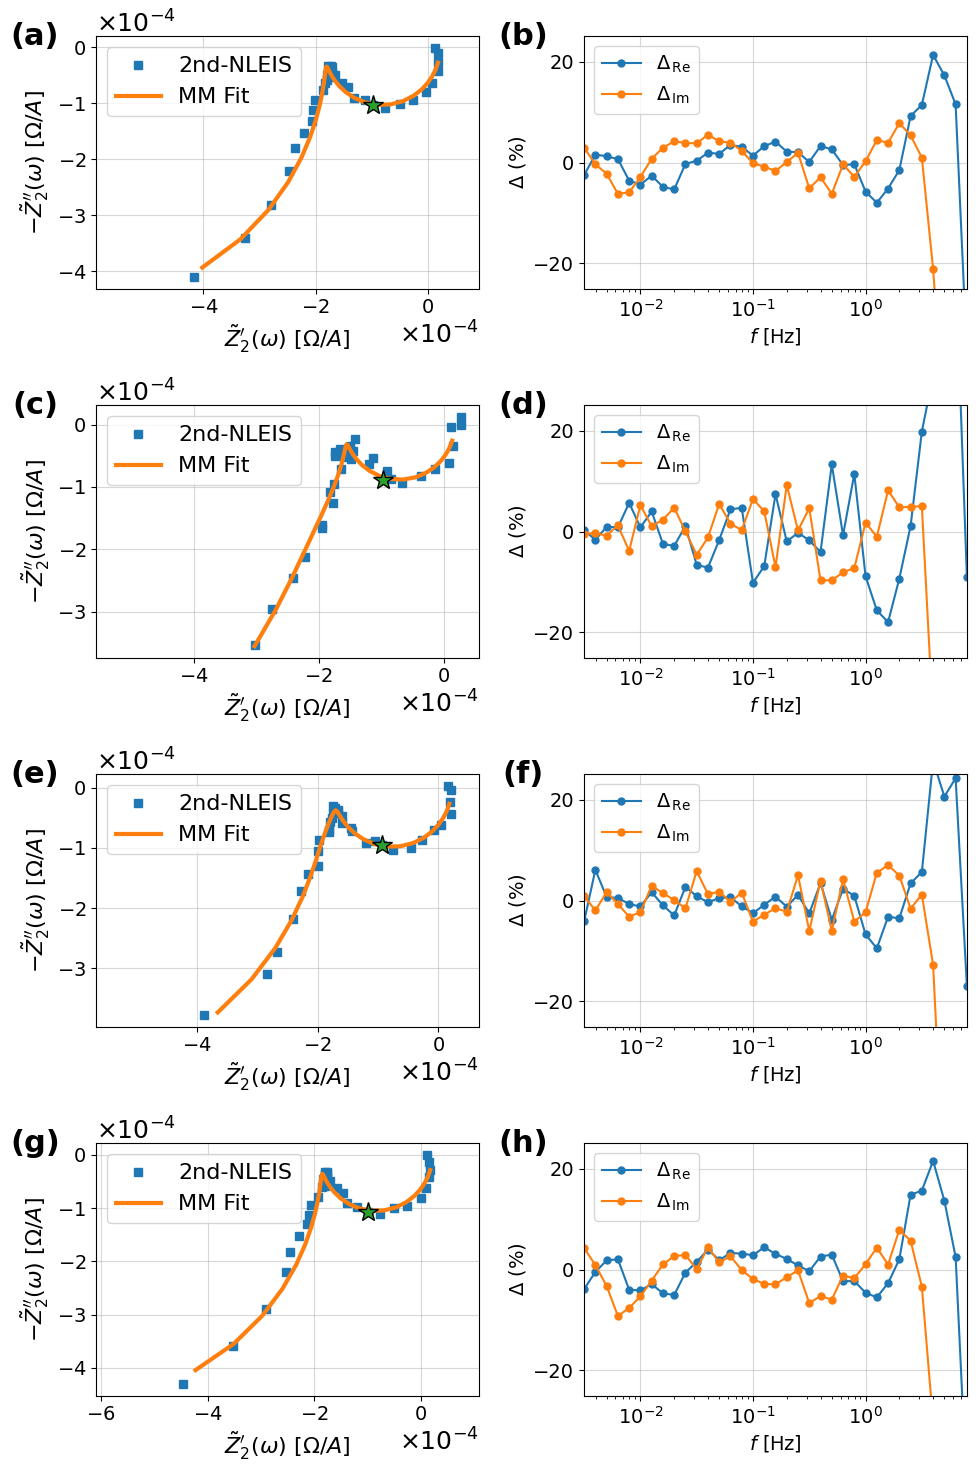

In [5]:
lb = -25
ub = 25
fig, ax = plt.subplots(4, 2, figsize=(10, 15))
for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')


# Figure (a)
# 2nd-NLEIS extracted from three amplitude data
plot_second(ax[0,0], Z2_18650, fmt='s',labelsize=fontsize)
plot_second(ax[0,0], Z2_18650_fit, fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,0], Z2_18650[data_18650['freq']==1],fmt = '*', labelsize=fontsize, markeredgecolor='black',ms = 15)

ax[0,0].legend(['2nd-NLEIS', 'MM Fit'], loc=2, fontsize=fontsize)

# Figure (b)
plot_residuals(ax[0,1], data_18650['freq'], Z2_18650_res_real, Z2_18650_res_imag, y_limits=(lb,ub), ms =10)

# 0.3 A data
# Figure (c)
plot_second(ax[1,0], Z2_18650_0p3A, fmt='s',labelsize=fontsize)
plot_second(ax[1,0], Z2_18650_0p3A_fit, fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[1,0], Z2_18650_0p3A[data_18650_0p3A['freq']==1],fmt = '*', labelsize=fontsize, markeredgecolor='black',ms = 15)

ax[1,0].legend(['2nd-NLEIS', 'MM Fit'], loc=2, fontsize=fontsize)

# Figure (d)
plot_residuals(ax[1,1], data_18650_0p3A['freq'], Z2_18650_0p3A_res_real, Z2_18650_0p3A_res_imag, y_limits=(lb,ub), ms =10)


# 0.4 A data
# Figure (e)
plot_second(ax[2,0], Z2_18650_0p4A, fmt='s',labelsize=fontsize)
plot_second(ax[2,0], Z2_18650_0p4A_fit, fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[2,0], Z2_18650_0p4A[data_18650_0p4A['freq']==1],fmt = '*', labelsize=fontsize, markeredgecolor='black',ms = 15)

ax[2,0].legend(['2nd-NLEIS', 'MM Fit'], loc=2, fontsize=fontsize)

# Figure (f)
plot_residuals(ax[2,1], data_18650_0p4A['freq'], Z2_18650_0p4A_res_real, Z2_18650_0p4A_res_imag, y_limits=(lb,ub), ms =10)


# 0.5 A data
# Figure (g)
plot_second(ax[3,0], Z2_18650_0p5A, fmt='s',labelsize=fontsize)
plot_second(ax[3,0], Z2_18650_0p5A_fit, fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[3,0], Z2_18650_0p5A[data_18650_0p5A['freq']==1], fmt = '*', labelsize=fontsize, markeredgecolor='black',ms = 15)

ax[3,0].legend(['2nd-NLEIS', 'MM Fit'], loc=2, fontsize=fontsize)

# Figure (h)
plot_residuals(ax[3,1], data_18650_0p5A['freq'], Z2_18650_0p5A_res_real, Z2_18650_0p5A_res_imag, y_limits=(lb,ub), ms =10)

# Reset the xlim for 2nd-NLEIS plots
ax[0,0].set_xlim([-6e-4, 1e-4])
ax[1,0].set_xlim([-6e-4, 1e-4])
ax[2,0].set_xlim([-6e-4, 1e-4])
ax[3,0].set_xlim([-6e-4, 1e-4])

plt.tight_layout()
plt.show ()

In [6]:
# fig.savefig('figures/SI/FigureS8.png',dpi=300,bbox_inches='tight')

# Pouch Cell Results

In [7]:
data_pouch_1 = pd.read_csv(StringIO(open("data/MM_program_results/Z2_pouch_1-C2.txt").read().partition("----")[0]),sep="\t")
data_pouch_2 = pd.read_csv(StringIO(open("data/MM_program_results/Z2_pouch_2-C3.txt").read().partition("----")[0]),sep="\t")

In [8]:
# pouch 1 data
Z2_pouch_1 = data_pouch_1['Zr data']+1j*data_pouch_1['Zj data']
Z2_pouch_1_fit = data_pouch_1['Zr model']+1j*data_pouch_1['Zj model']
Z2_pouch_1_res_real = (data_pouch_1['Zr data']-data_pouch_1['Zr model'])/abs(Z2_pouch_1)
Z2_pouch_1_res_imag = (data_pouch_1['Zj data']-data_pouch_1['Zj model'])/abs(Z2_pouch_1)

# pouch 2 data
Z2_pouch_2 = data_pouch_2['Zr data']+1j*data_pouch_2['Zj data']
Z2_pouch_2_fit = data_pouch_2['Zr model']+1j*data_pouch_2['Zj model']
Z2_pouch_2_res_real = (data_pouch_2['Zr data']-data_pouch_2['Zr model'])/abs(Z2_pouch_2)
Z2_pouch_2_res_imag = (data_pouch_2['Zj data']-data_pouch_2['Zj model'])/abs(Z2_pouch_2)


## Figure S12

### Measurement model program test results for Pouch Cell data

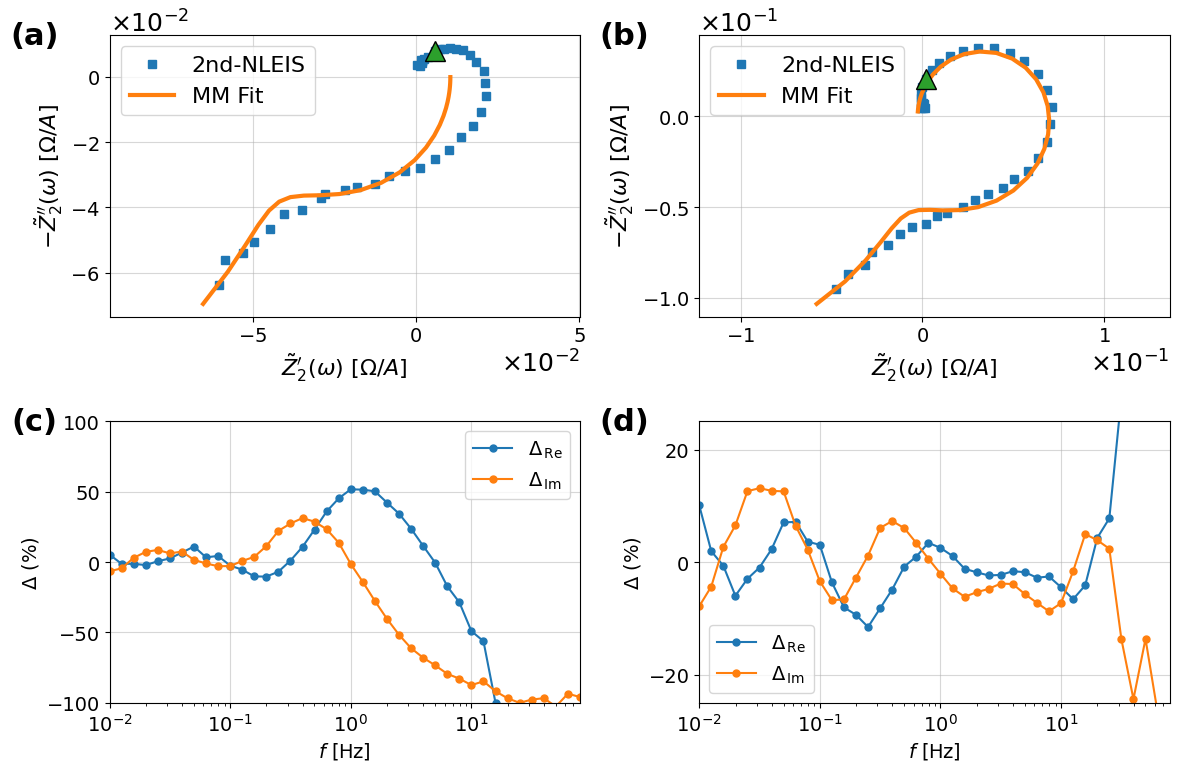

In [9]:
lb = -25
ub = 25
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a) pouch 1 data
plot_second(ax[0,0], Z2_pouch_1, fmt='s',labelsize=fontsize)
plot_second(ax[0,0], Z2_pouch_1_fit, fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,0], Z2_pouch_1[data_pouch_1['freq']==10],fmt = '^', labelsize=fontsize, markeredgecolor='black',ms = 15)

ax[0,0].legend(['2nd-NLEIS', 'MM Fit'], loc=2, fontsize=fontsize)

# Figure (b) pouch 2 data
plot_second(ax[0,1], Z2_pouch_2, fmt='s',labelsize=fontsize)
plot_second(ax[0,1], Z2_pouch_2_fit, fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,1], Z2_pouch_2[data_pouch_2['freq']==10],fmt = '^', labelsize=fontsize, markeredgecolor='black',ms = 15)

ax[0,1].legend(['2nd-NLEIS', 'MM Fit'], loc=2, fontsize=fontsize)

# Figure (c) pouch 1 residual
plot_residuals(ax[1,0], data_pouch_1['freq'], Z2_pouch_1_res_real, Z2_pouch_1_res_imag, y_limits=(-100,100), ms =10)

# Figure (d) pouch 2 residual
plot_residuals(ax[1,1], data_pouch_2['freq'], Z2_pouch_2_res_real, Z2_pouch_2_res_imag, y_limits=(lb,ub), ms =10)

plt.tight_layout()
plt.show ()

In [10]:
# fig.savefig('figures/SI/FigureS12.png',dpi=300,bbox_inches='tight')

# Coin Cell

In [11]:
data_coin = pd.read_csv(StringIO(open("data/MM_program_results/Z2_coin-C3.txt").read().partition("----")[0]),sep="\t")

In [12]:
Z2_coin = data_coin['Zr data']+1j*data_coin['Zj data']
Z2_coin_fit = data_coin['Zr model']+1j*data_coin['Zj model']
Z2_coin_res_real = (data_coin['Zr data']-data_coin['Zr model'])/abs(Z2_coin)
Z2_coin_res_imag = (data_coin['Zj data']-data_coin['Zj model'])/abs(Z2_coin)

## Figure S15.

### Measurement model program test results for In-house Coin Cell data

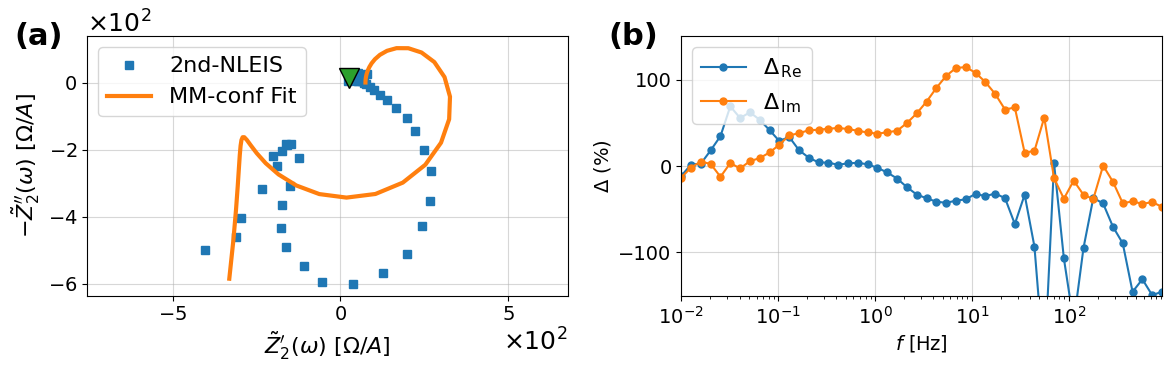

In [13]:
lb = -150
ub = 150

fig, ax = plt.subplots(1,2, figsize=(12, 4))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.1, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
plot_second(ax[0], Z2_coin, fmt='s',labelsize=fontsize)
plot_second(ax[0],Z2_coin_fit, fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0], Z2_coin[data_coin['freq']==112.74], labelsize=fontsize, fmt='v', markeredgecolor='black',ms = 15)

ax[0].legend(['2nd-NLEIS', 'MM-conf Fit'], loc=2, fontsize=fontsize)

# Figure (b) residual error plot
plot_residuals(ax[1], data_coin['freq'], Z2_coin_res_real, Z2_coin_res_imag, y_limits=(lb,ub), ms =10)
ax[1].legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [14]:
# fig.savefig('figures/SI/FigureS15.png',dpi=300,bbox_inches='tight')